#Get The Dataset

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! kaggle datasets download -d phucthaiv02/butterfly-image-classification

Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
 98% 221M/226M [00:02<00:00, 97.3MB/s]
100% 226M/226M [00:02<00:00, 87.0MB/s]


In [4]:
! unzip butterfly-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Image_2348.jpg    
  inflating: train/Image_2349.jpg    
  inflating: train/Image_235.jpg     
  inflating: train/Image_2350.jpg    
  inflating: train/Image_2351.jpg    
  inflating: train/Image_2352.jpg    
  inflating: train/Image_2353.jpg    
  inflating: train/Image_2354.jpg    
  inflating: train/Image_2355.jpg    
  inflating: train/Image_2356.jpg    
  inflating: train/Image_2357.jpg    
  inflating: train/Image_2358.jpg    
  inflating: train/Image_2359.jpg    
  inflating: train/Image_236.jpg     
  inflating: train/Image_2360.jpg    
  inflating: train/Image_2361.jpg    
  inflating: train/Image_2362.jpg    
  inflating: train/Image_2363.jpg    
  inflating: train/Image_2364.jpg    
  inflating: train/Image_2365.jpg    
  inflating: train/Image_2366.jpg    
  inflating: train/Image_2367.jpg    
  inflating: train/Image_2368.jpg    
  inflating: train/Image_2369.jpg    
  inflating: train/Image_237.jpg     

#Import Python Module

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers
import warnings
import seaborn as sns



In [6]:
df = pd.read_csv('Training_set.csv')
df.head()

filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART

In [7]:
len(df)

6499

<ipython-input-16-e99f81580b67>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_count.index, y=class_count.values, palette='viridis')


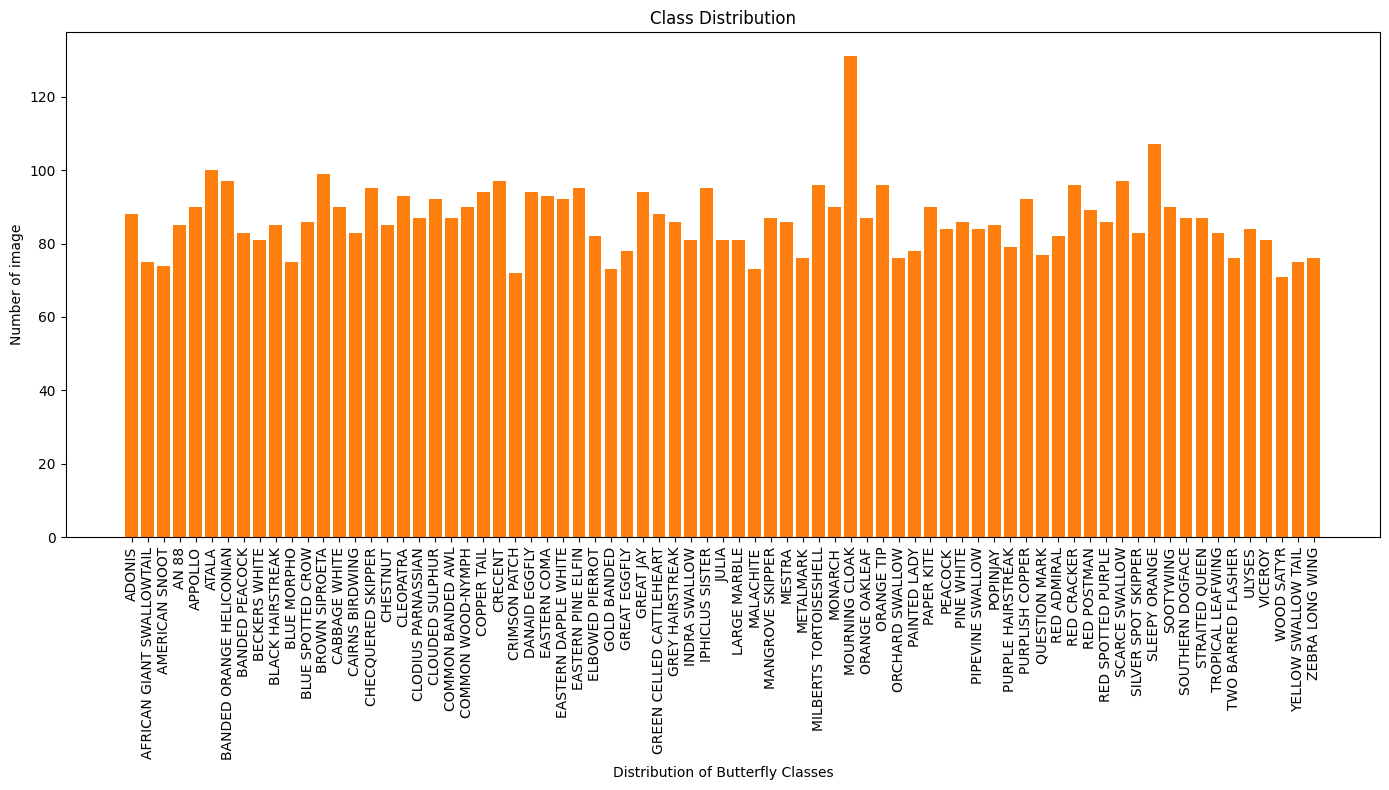

In [16]:
import seaborn as sns
class_count = df['label'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.barplot(x=class_count.index, y=class_count.values, palette='viridis')
plt.bar(class_count.index, class_count.values)
plt.xlabel('Distribution of Butterfly Classes')
plt.ylabel('Number of image')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

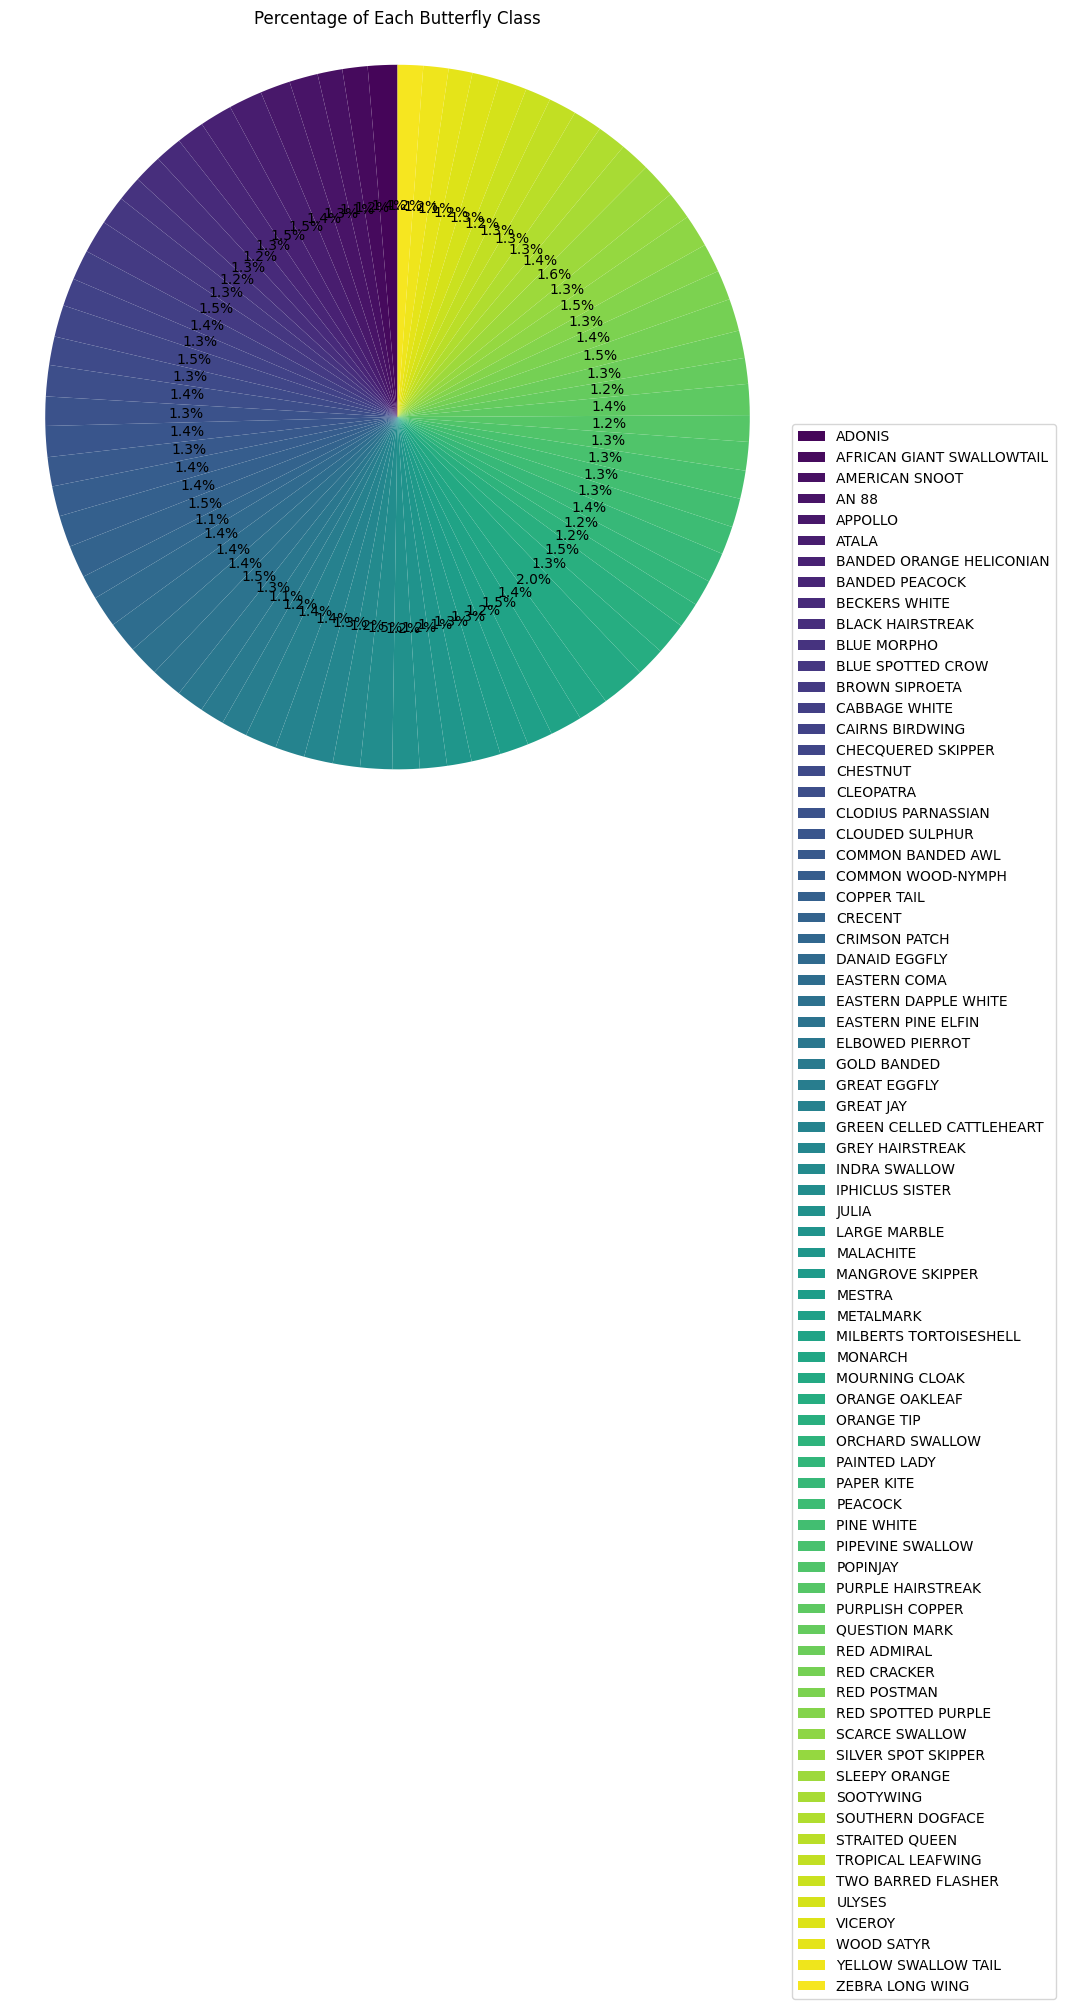

In [19]:
colors = sns.color_palette("viridis", len(class_count))
class_counts = df['label'].value_counts().sort_index()


plt.figure(figsize=(10, 10))
plt.pie(class_count.values, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Each Butterfly Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(class_count.index, loc="best", bbox_to_anchor=(1, 0.5))
plt.show()

#Explore Images

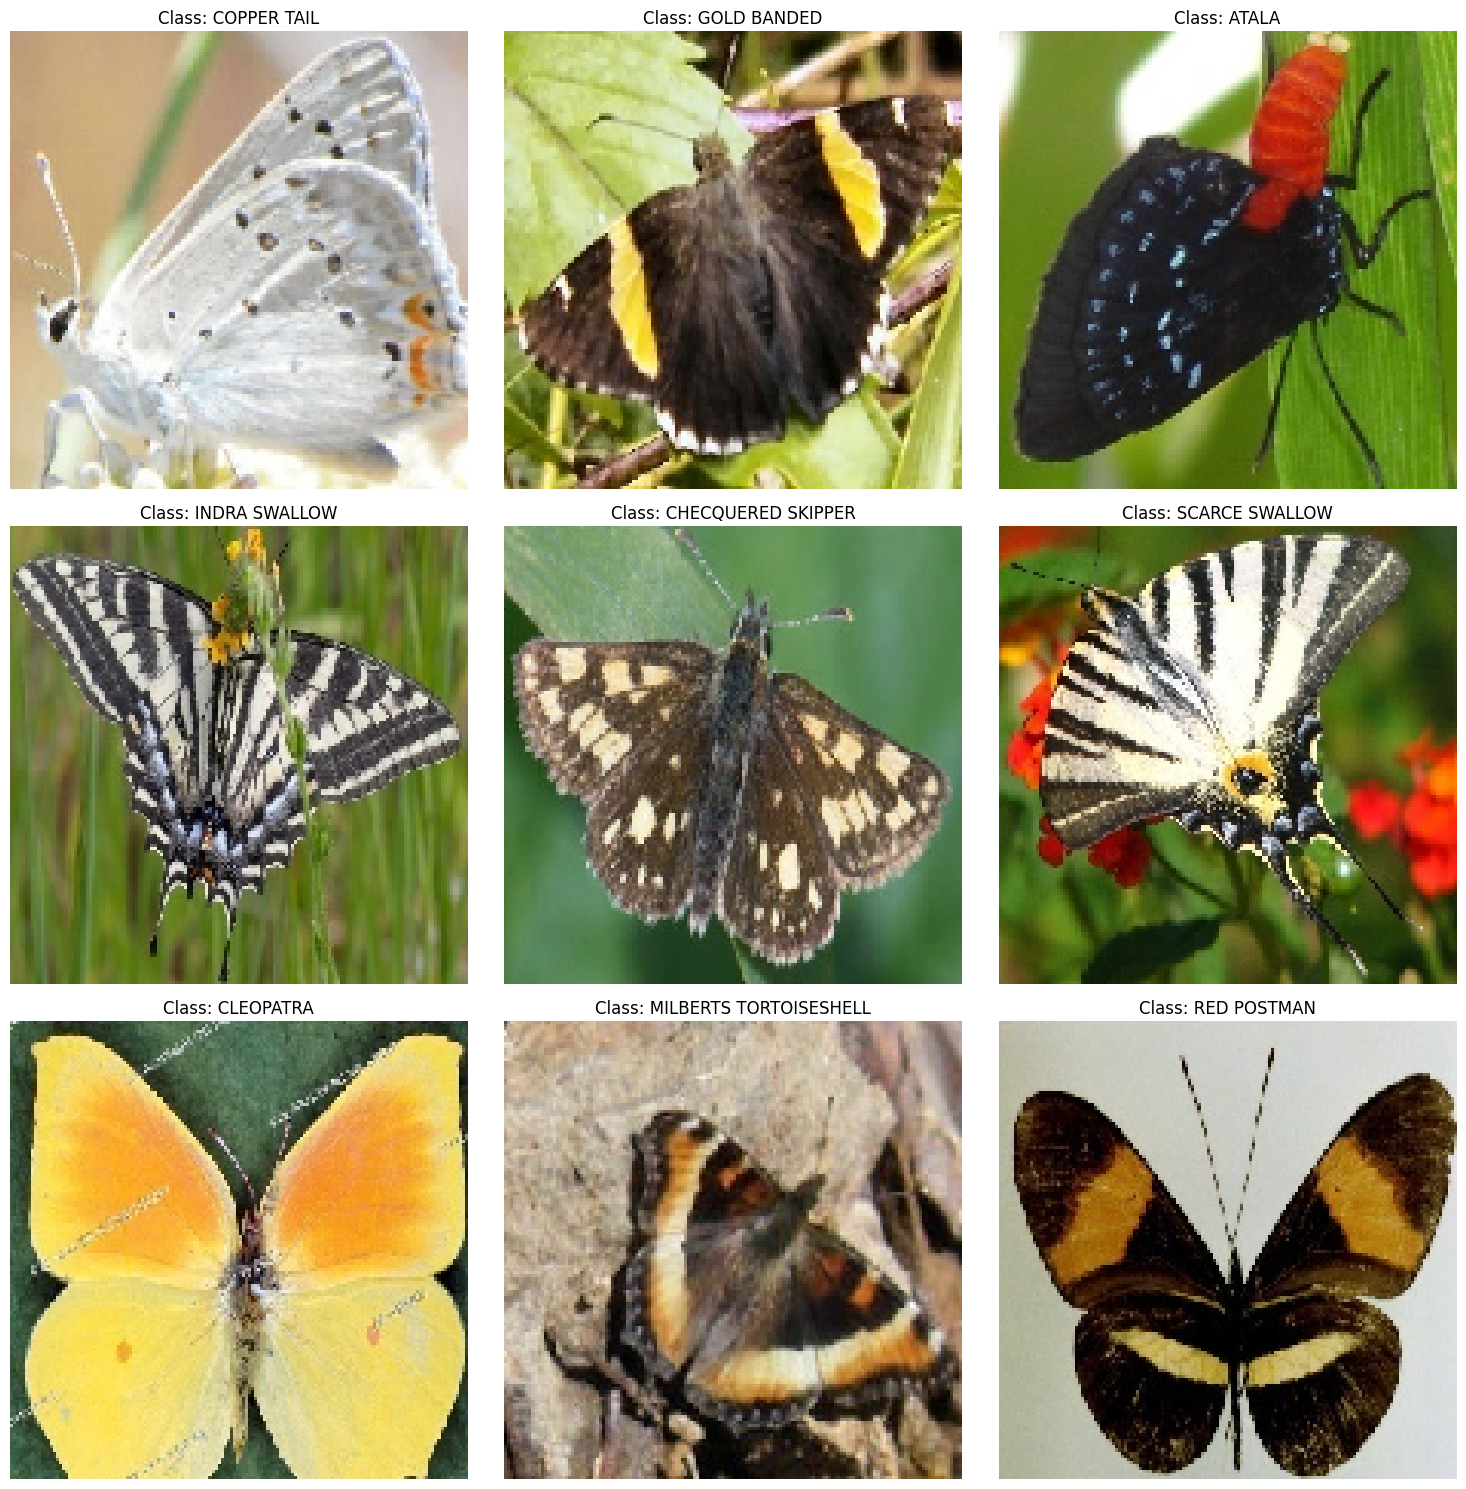

<Figure size 640x480 with 0 Axes>

In [26]:
image_dir = "train"

sample_images = df.sample(9, random_state=40)


fig, axes = plt.subplots(3, 3, figsize=(15, 15))


for i, (index, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(image_dir, row['filename'])
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0  # Normalize the image

    ax = axes[i // 3, i % 3]
    ax.imshow(img_array)
    ax.set_title(f"Class: {row['label']}")
    ax.axis('off')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [27]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

image_dir = "train"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


#Building The Model

In [28]:
model_CNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(75, activation='softmax')
])

model_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_CNN.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 75)                  │          38,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,072,139 (72.75 MB)

 Trainable params: 19,072,139 (72.75 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model_CNN.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=40,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


162/162 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.0398 - loss: 4.1292 - val_accuracy: 0.1750 - val_loss: 3.1825
Epoch 2/40
  1/162 ━━━━━━━━━━━━━━━━━━━━ 7:31 3s/step - accuracy: 0.1250 - loss: 3.2001

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1250 - loss: 3.2001 - val_accuracy: 0.1500 - val_loss: 3.4842
Epoch 3/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.2080 - loss: 3.0234 - val_accuracy: 0.3352 - val_loss: 2.4487
Epoch 4/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3125 - loss: 2.5571 - val_accuracy: 0.3000 - val_loss: 2.3297
Epoch 5/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.3251 - loss: 2.4887 - val_accuracy: 0.3703 - val_loss: 2.2888
Epoch 6/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2812 - loss: 2.8787 - val_accuracy: 0.4500 - val_loss: 2.4324
Epoch 7/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.4114 - loss: 2.0964 - val_accuracy: 0.4812 - val_loss: 1.8618
Epoch 8/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4062 - loss: 1.6788 - val_accuracy: 0.3000 - val_loss: 2.2346
Epoch 9/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.4822 - loss: 1.8418 - val_accuracy: 0.5531 - 

# Evaluating the Model

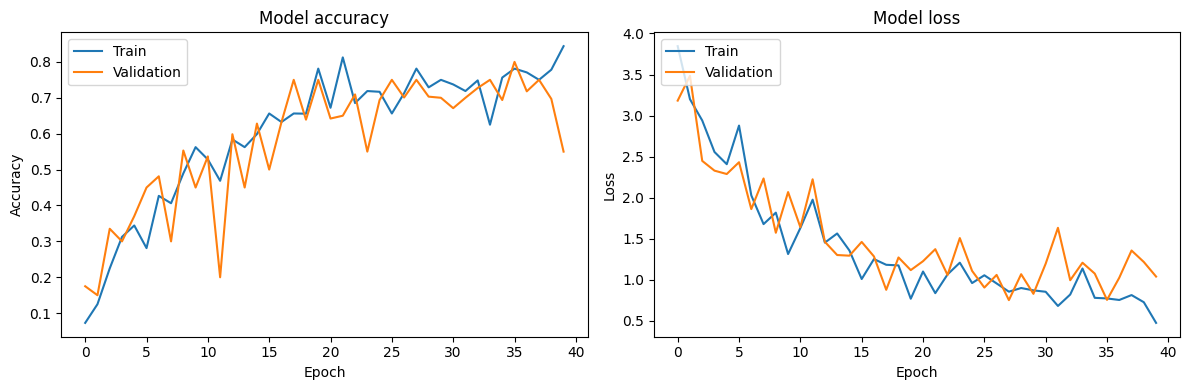

In [30]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [31]:
val_images, val_labels = next(val_generator)

pred_labels = model_CNN.predict(val_images)
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

def display_images(images, true_labels, pred_labels, class_names, num_images=9):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


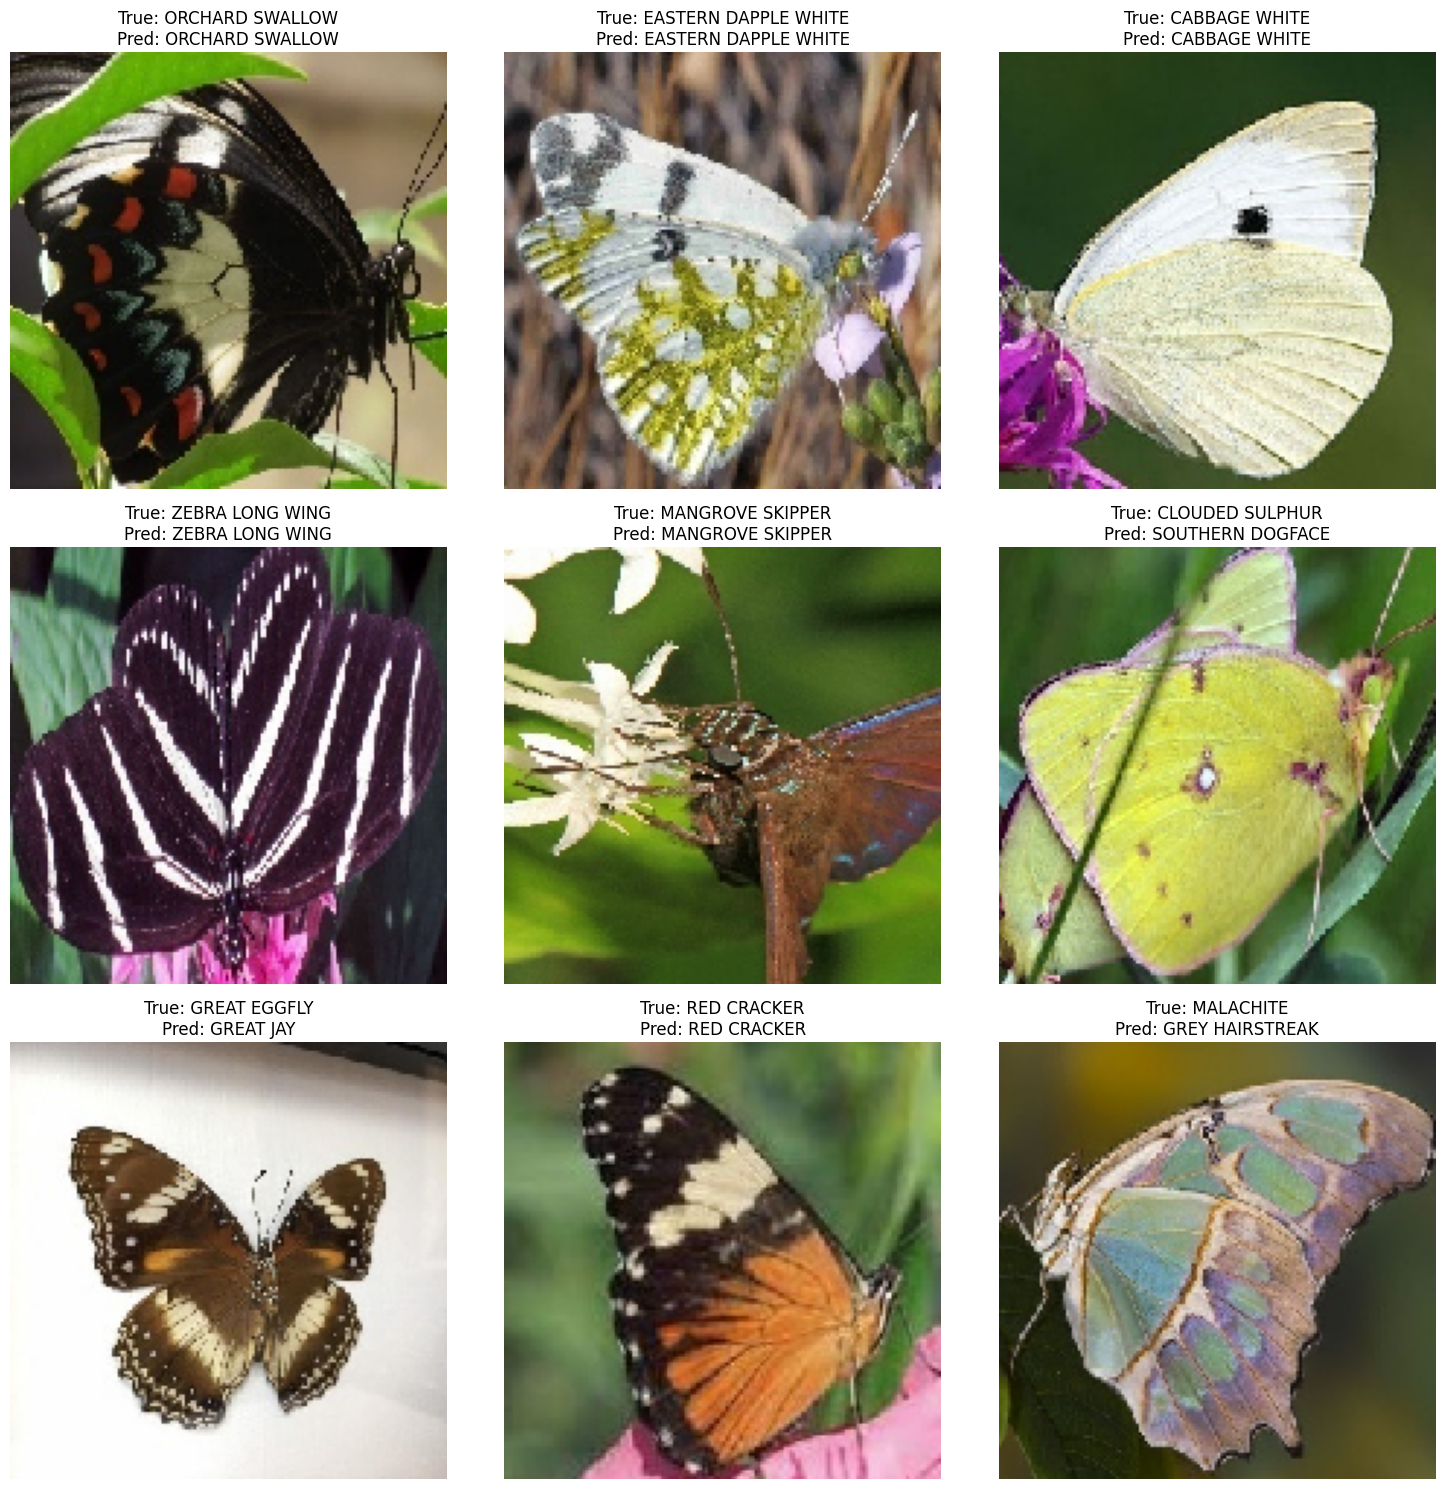

In [32]:
display_images(val_images, true_labels, pred_labels, class_names, num_images=9)

In [33]:
model_CNN.save("model.h5")